In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
import pathlib
data_dir = r"/root/data_Camera"
type(data_dir)


str

In [22]:
print(data_dir)

/root/data_Camera


In [23]:
data_dir = pathlib.Path(data_dir)
type(data_dir)

pathlib.PosixPath

In [24]:
print(data_dir)

/root/data_Camera


/root/data_Camera/rock/7127B1_R_NE_0.jpg


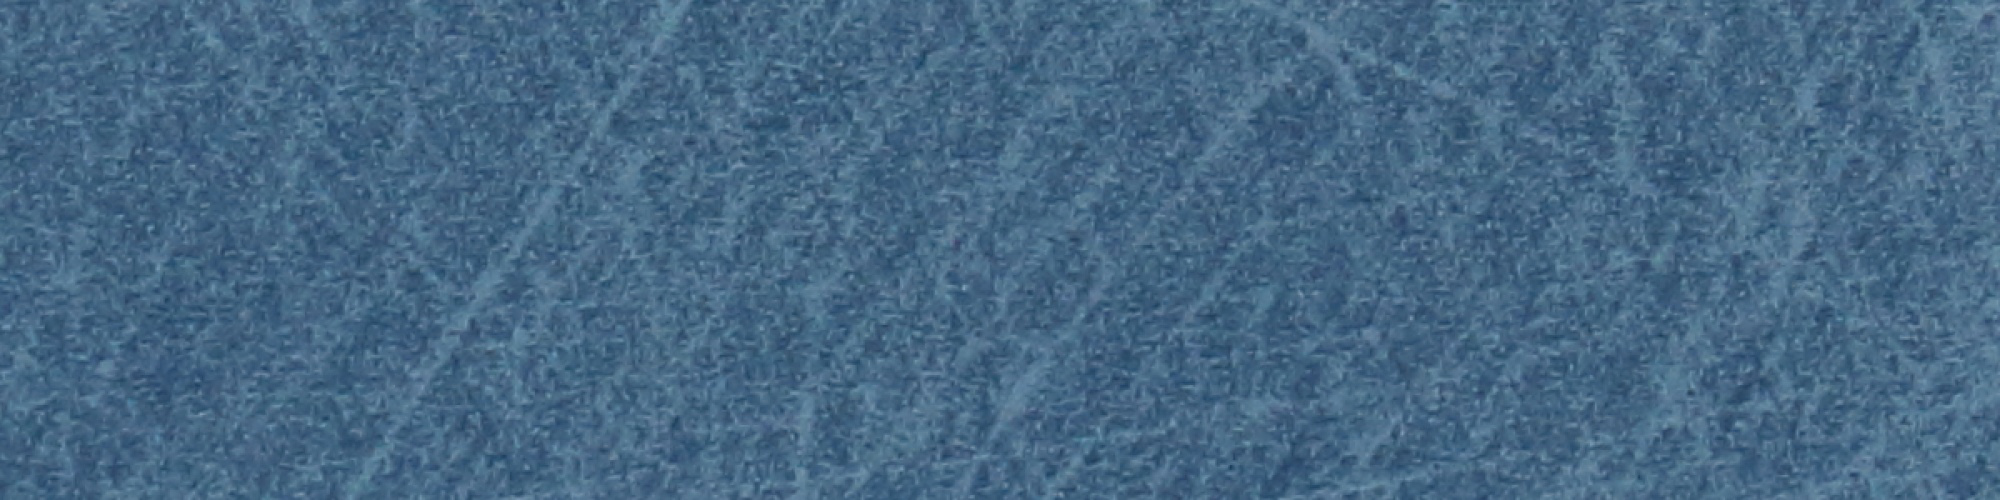

In [25]:
rock = list(data_dir.glob('rock/*'))
print(rock[0])
PIL.Image.open(str(rock[0]))

In [44]:
img_height, img_width = 400,2000
batch_size = 32
trains_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 2204 files belonging to 5 classes.
Using 1764 files for training.


In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2204 files belonging to 5 classes.
Using 440 files for validation.


In [46]:
class_names = trains_ds.class_names
print(class_names)

['cloth', 'metallic', 'other', 'rock', 'wooden']


In [52]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False, 
                                                  input_shape=(400,2000,3),
                                                  pooling='avg', 
                                                  classes = 5, 
                                                  weights = 'imagenet')
for layer in pretrained_model.layers: 
    layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4,activation='softmax'))

In [53]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 2052      
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [54]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [55]:
epochs = 10
history= resnet_model.fit(
    trains_ds,
    validation_data=val_ds,
    epochs=epochs)


Epoch 1/10


ValueError: in user code:

    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:797 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:1644 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 5) and (None, 4) are incompatible


In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

NameError: name 'history' is not defined

In [ ]:
import cv2
image = cv2.imread(str(rock[0]))
image_resized = cv2.resize(image,(img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)